In [2]:
import datetime as dt
import pandas as pd
from pandas_datareader import wb #world bank
import math
import matplotlib as plt


plt.rcParams['figure.figsize'] = (30.0, 20.0)

In [212]:
 wb.search('gni').iloc[:,:2]

,id,name
686,6.0.GNIpc,GNI per capita (2011 $)
1703,DC.ODA.TLDC.GN.ZS,Net ODA provided to the least developed countr...
1705,DC.ODA.TOTL.GN.ZS,"Net ODA provided, total (% of GNI)"
2790,DT.DOD.DECT.GN.ZS,External debt stocks (% of GNI)
3622,DT.DOD.PVLX.GN.ZS,Present value of external debt (% of GNI)
3862,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI)
4265,DT.ODA.ODAT.GN.ZS,Net ODA received (% of GNI)
4401,DT.TDS.DECT.GN.ZS,Total debt service (% of GNI)
4599,DT.TDS.DPPG.GN.ZS,Public and publicly guaranteed debt service (%...
5596,IC.FRM.INNOV.T1,Percent of firms with an internationally-recog...


In [115]:
 wb.search('water').iloc[:,:2]

,id,name
79,2.0.cov.Wat,Coverage: Water
104,2.0.hoi.Wat,HOI: Water
679,5.51.01.09.water,Access to water
1662,DAK.INFR.H2O.CR,Total Specific Allocation Grant for Infrastruc...
4243,DT.ODA.DACD.WSS.CD,Gross ODA aid disbursement for water supply an...
4689,EE.BOD.TOTL.KG,Organic water pollutant (BOD) emissions (kg pe...
4794,ER.GDP.FWTL.M3.KD,"Water productivity, total (constant 2010 US$ G..."
4795,ER.H2O.FWAG.ZS,"Annual freshwater withdrawals, agriculture (% ..."
4796,ER.H2O.FWDM.ZS,"Annual freshwater withdrawals, domestic (% of ..."
4797,ER.H2O.FWIN.ZS,"Annual freshwater withdrawals, industry (% of ..."


In [221]:
ind = ["NY.GNP.PCAP.PP.CD", 'NY.GDP.PCAP.PP.CD', 'NY.GDP.PCAP.CD',  "NY.GNP.MKTP.PC.CD", 'NY.GDP.MKTP.CD']
data = wb.download(indicator = ind, country = ['ALL'], start = 2015, end = 2015)
data

,,NY.GNP.PCAP.PP.CD,NY.GDP.PCAP.PP.CD,NY.GDP.PCAP.CD,SE.XPD.PRIM.PC.ZS,NY.GNP.MKTP.PC.CD,NY.GDP.MKTP.CD,5.51.01.09.water
country,year,,,,,,,
Arab World,2015,16428.806381,16454.577524,6545.217753,NaN,6527.598657,2.565871e+12,NaN
Caribbean small states,2015,15095.842513,15535.453196,9495.758444,NaN,9214.862118,6.693528e+10,NaN
Central Europe and the Baltics,2015,25251.372220,26151.245851,12403.328669,NaN,11972.392882,1.281495e+12,NaN
Early-demographic dividend,2015,8613.241339,8645.169100,3187.699012,NaN,3173.399515,9.954238e+12,NaN
East Asia & Pacific,2015,16127.641274,16105.792830,9397.921401,NaN,9439.935161,2.168000e+13,NaN
East Asia & Pacific (excluding high income),2015,12893.517217,12967.350787,6488.381689,NaN,6460.644104,1.320470e+13,NaN
East Asia & Pacific (IDA & IBRD countries),2015,13030.194927,13104.805027,6557.181062,NaN,NaN,1.317947e+13,NaN
Euro area,2015,41179.397060,41131.043913,34182.375862,NaN,34228.379902,1.160236e+13,NaN
Europe & Central Asia,2015,30039.689025,30308.539786,22112.394936,NaN,22009.530973,2.007682e+13,NaN


In [175]:
countries
countries_exceptions = "AIA ALA ATA ATF BES BLM BVT CCK COK CXR ESH FLK GGY GLP GUF HMD IOT JEY MSR MTQ MYT NFK NIU PCN REU SGS SHN SJM SPM TKL TWN UMI VAT WLF"

In [178]:
new_countries = list( set(countries) - set(countries_exceptions.split(" ")) )

In [327]:
data = wb.download(indicator = ind, country = new_countries, start = 2015, end = 2015)


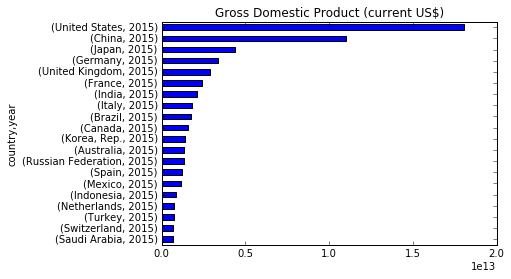

In [224]:
# top 10 countries with the largest GDP
%matplotlib inline
# GDP (current US$)
fig = data["NY.GDP.MKTP.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                            .head(n=20).plot(kind="barh", title = "Gross Domestic Product (current US$)")

fig.invert_yaxis()
#fig.title = "GDP (current US$)"

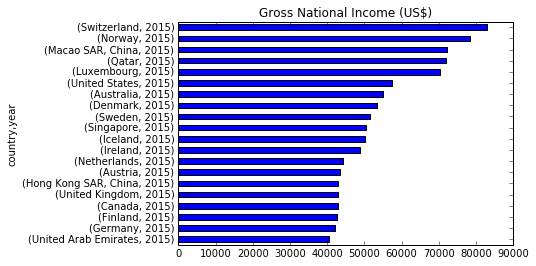

In [225]:
# top 10 countries with the largest GDP
%matplotlib inline
fig = data["NY.GNP.MKTP.PC.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                               .head(n=20).plot(kind="barh", title="Gross National Income (US$)")
fig.invert_yaxis()

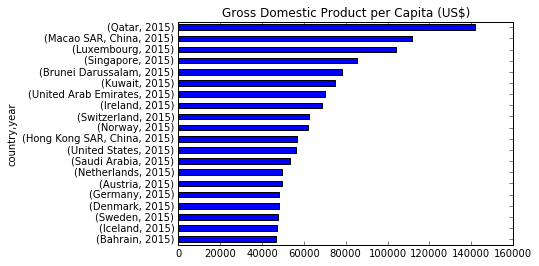

In [228]:
# top 10 countries with the largest GDP
%matplotlib inline
fig = data["NY.GDP.PCAP.PP.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                               .head(n=20).plot(kind="barh", title="Gross Domestic Product per Capita (US$)")
fig.invert_yaxis()

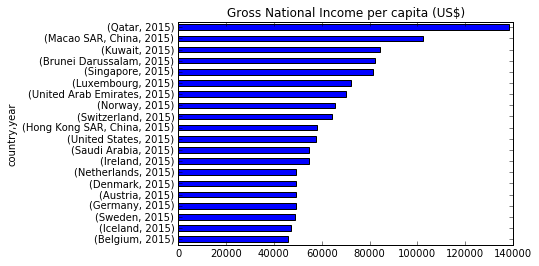

In [227]:
# top 10 countries with the largest GDP
%matplotlib inline
fig = data["NY.GNP.PCAP.PP.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                               .head(n=20).plot(kind="barh", title="Gross National Income per capita (US$)")
fig.invert_yaxis()

In [229]:
data = wb.download(indicator = ind, country = new_countries, start = 2005, end = 2005)


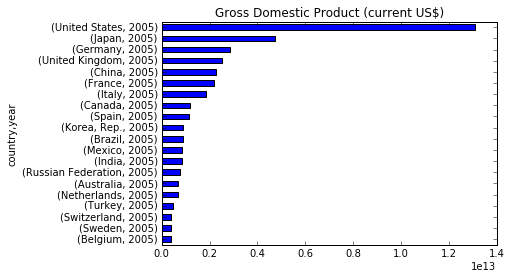

In [230]:
# top 10 countries with the largest GDP
%matplotlib inline
# GDP (current US$)
fig = data["NY.GDP.MKTP.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                            .head(n=20).plot(kind="barh", title = "Gross Domestic Product (current US$)")

fig.invert_yaxis()
#fig.title = "GDP (current US$)"

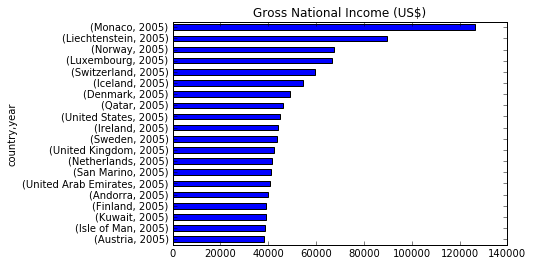

In [231]:
# top 10 countries with the largest GDP
%matplotlib inline
fig = data["NY.GNP.MKTP.PC.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                               .head(n=20).plot(kind="barh", title="Gross National Income (US$)")
fig.invert_yaxis()

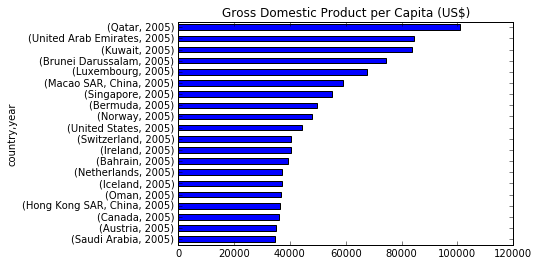

In [232]:
# top 10 countries with the largest GDP
%matplotlib inline
fig = data["NY.GDP.PCAP.PP.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                               .head(n=20).plot(kind="barh", title="Gross Domestic Product per Capita (US$)")
fig.invert_yaxis()

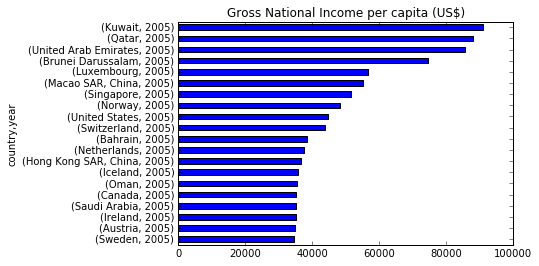

In [233]:
# top 10 countries with the largest GDP
%matplotlib inline
fig = data["NY.GNP.PCAP.PP.CD"].sort_values(ascending=False, inplace=False, na_position='last')\
                               .head(n=20).plot(kind="barh", title="Gross National Income per capita (US$)")
fig.invert_yaxis()

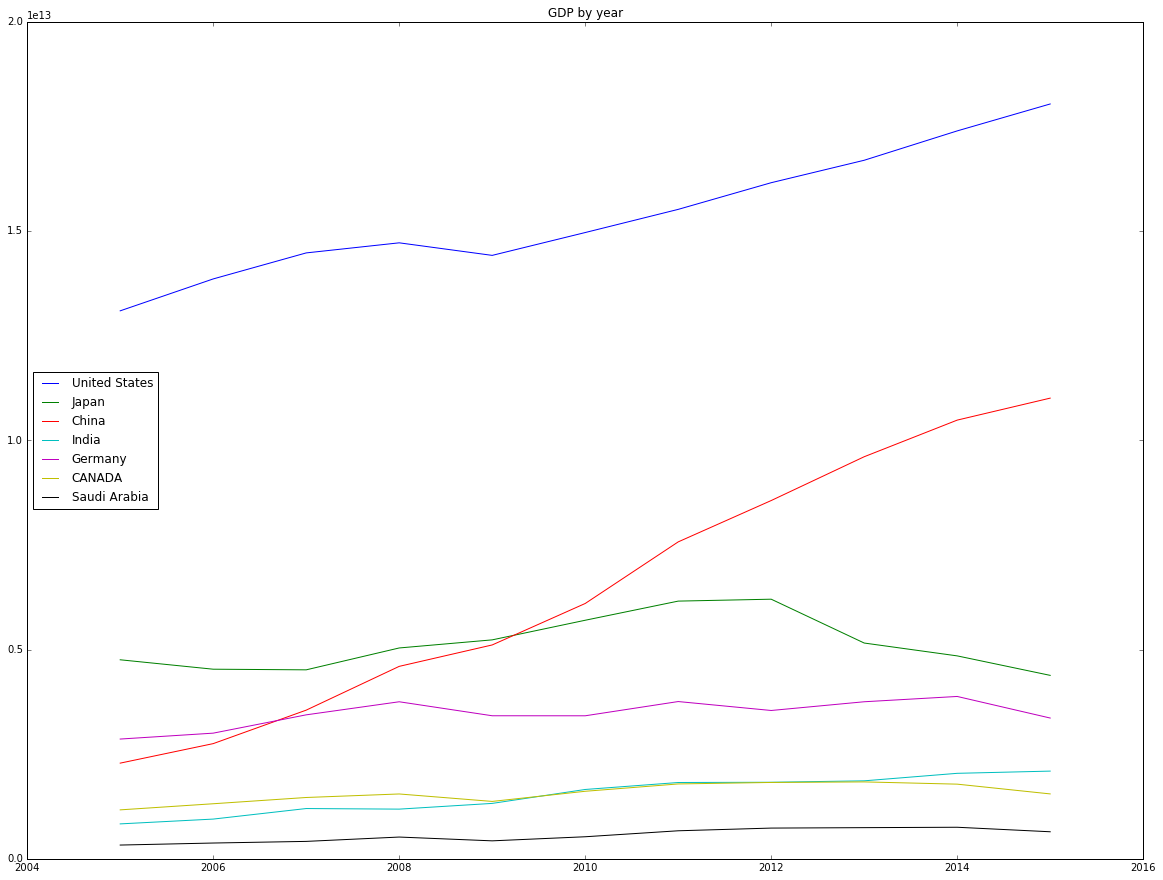

In [313]:
import matplotlib.pyplot as plt
country_small_set = ["USA", "JP", "CN", "IND", "DEU", "CAN", "SAU"]
country_full_name = ["United States", "Japan", "China", "India", "Germany", "CANADA", "Saudi Arabia"]
plt.figure(figsize = (20,15))


for ct in country_small_set:
    year_10_data = wb.download(indicator = ind, country = ct, start = 2005, end = 2015)
    plt.plot(year_10_data.index.get_level_values('year'),year_10_data["NY.GDP.MKTP.CD"])
plt.legend(country_full_name, loc="center left")
plt.title('GDP by year')

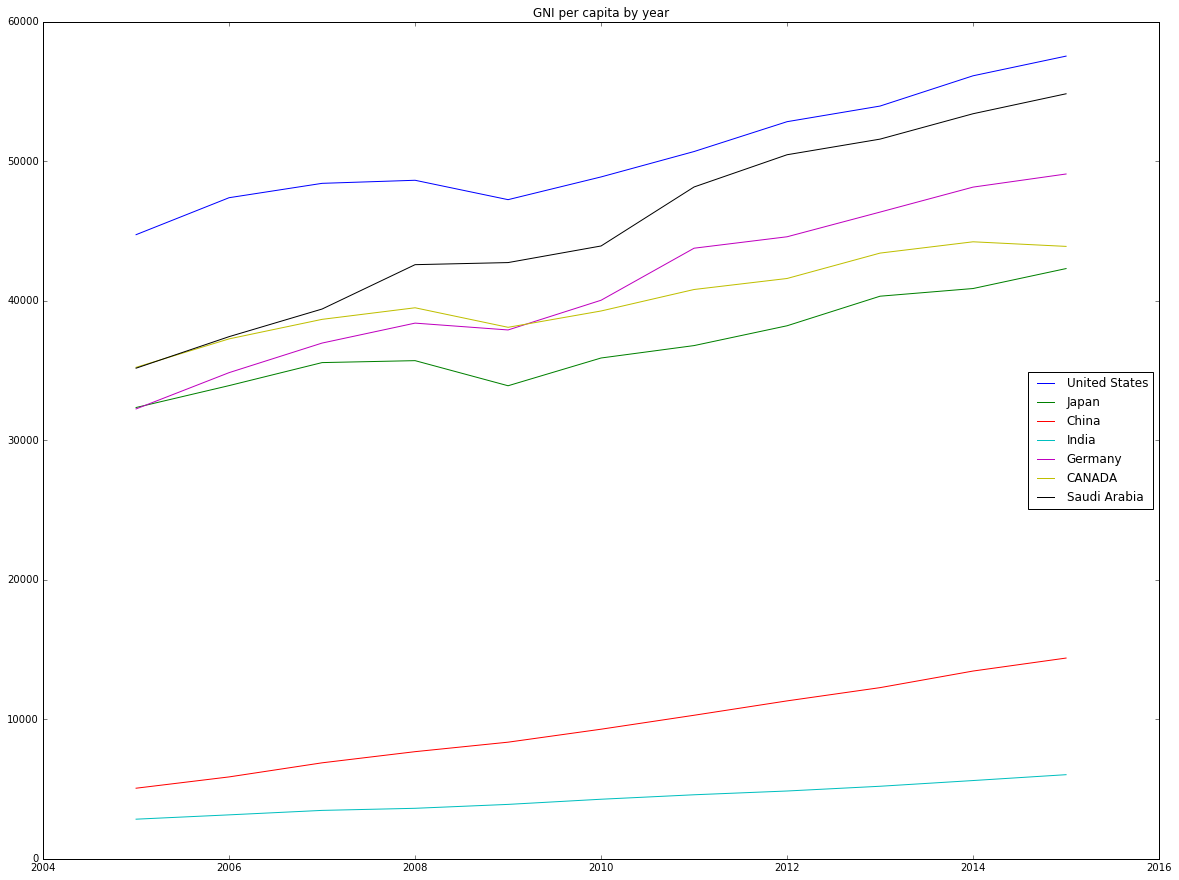

In [314]:
plt.figure(figsize = (20,15))
for ct in country_small_set:
    year_10_data = wb.download(indicator = ind, country = ct, start = 2005, end = 2015)
    plt.plot(year_10_data.index.get_level_values('year'),year_10_data["NY.GNP.PCAP.PP.CD"])
plt.legend(country_full_name, loc="center right")
plt.title('GNI per capita by year')

In [288]:
year_10_data.index.get_level_values('year')

Index([u'2015', u'2014', u'2013', u'2012', u'2011', u'2010', u'2009', u'2008',
       u'2007', u'2006', u'2005'],
      dtype='object', name=u'year')

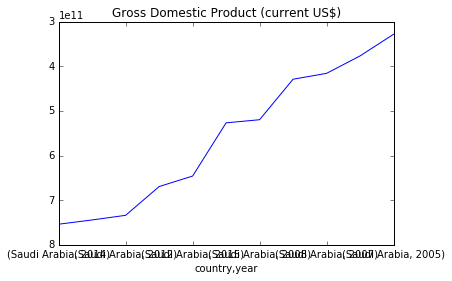

In [315]:
#grouping countries.

In [347]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
def group_plot(X):
    # h is the step siz
    h_n = 100
    reduced_data = PCA(n_components=2).fit_transform(X)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(reduced_data)
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
    offset = 0.3
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - offset, reduced_data[:, 0].max() + offset
    y_min, y_max = reduced_data[:, 1].min() - offset, reduced_data[:, 1].max() + offset
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/h_n), np.arange(y_min, y_max, (y_max-y_min)/h_n))

    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.figure(figsize=(30,30))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    #plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=10)
    count = 0
    colors = "bgrcmykw"
    for i,j in zip(reduced_data[:, 0],reduced_data[:, 1]):
        corr = 0  # adds a little correction to put annotation in marker's centrum
        plt.annotate(X.index.get_level_values('country')[count],  xy=(i + corr, j + corr), size= 30, color=colors[count%8])
        count += 1
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the spx500 dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()


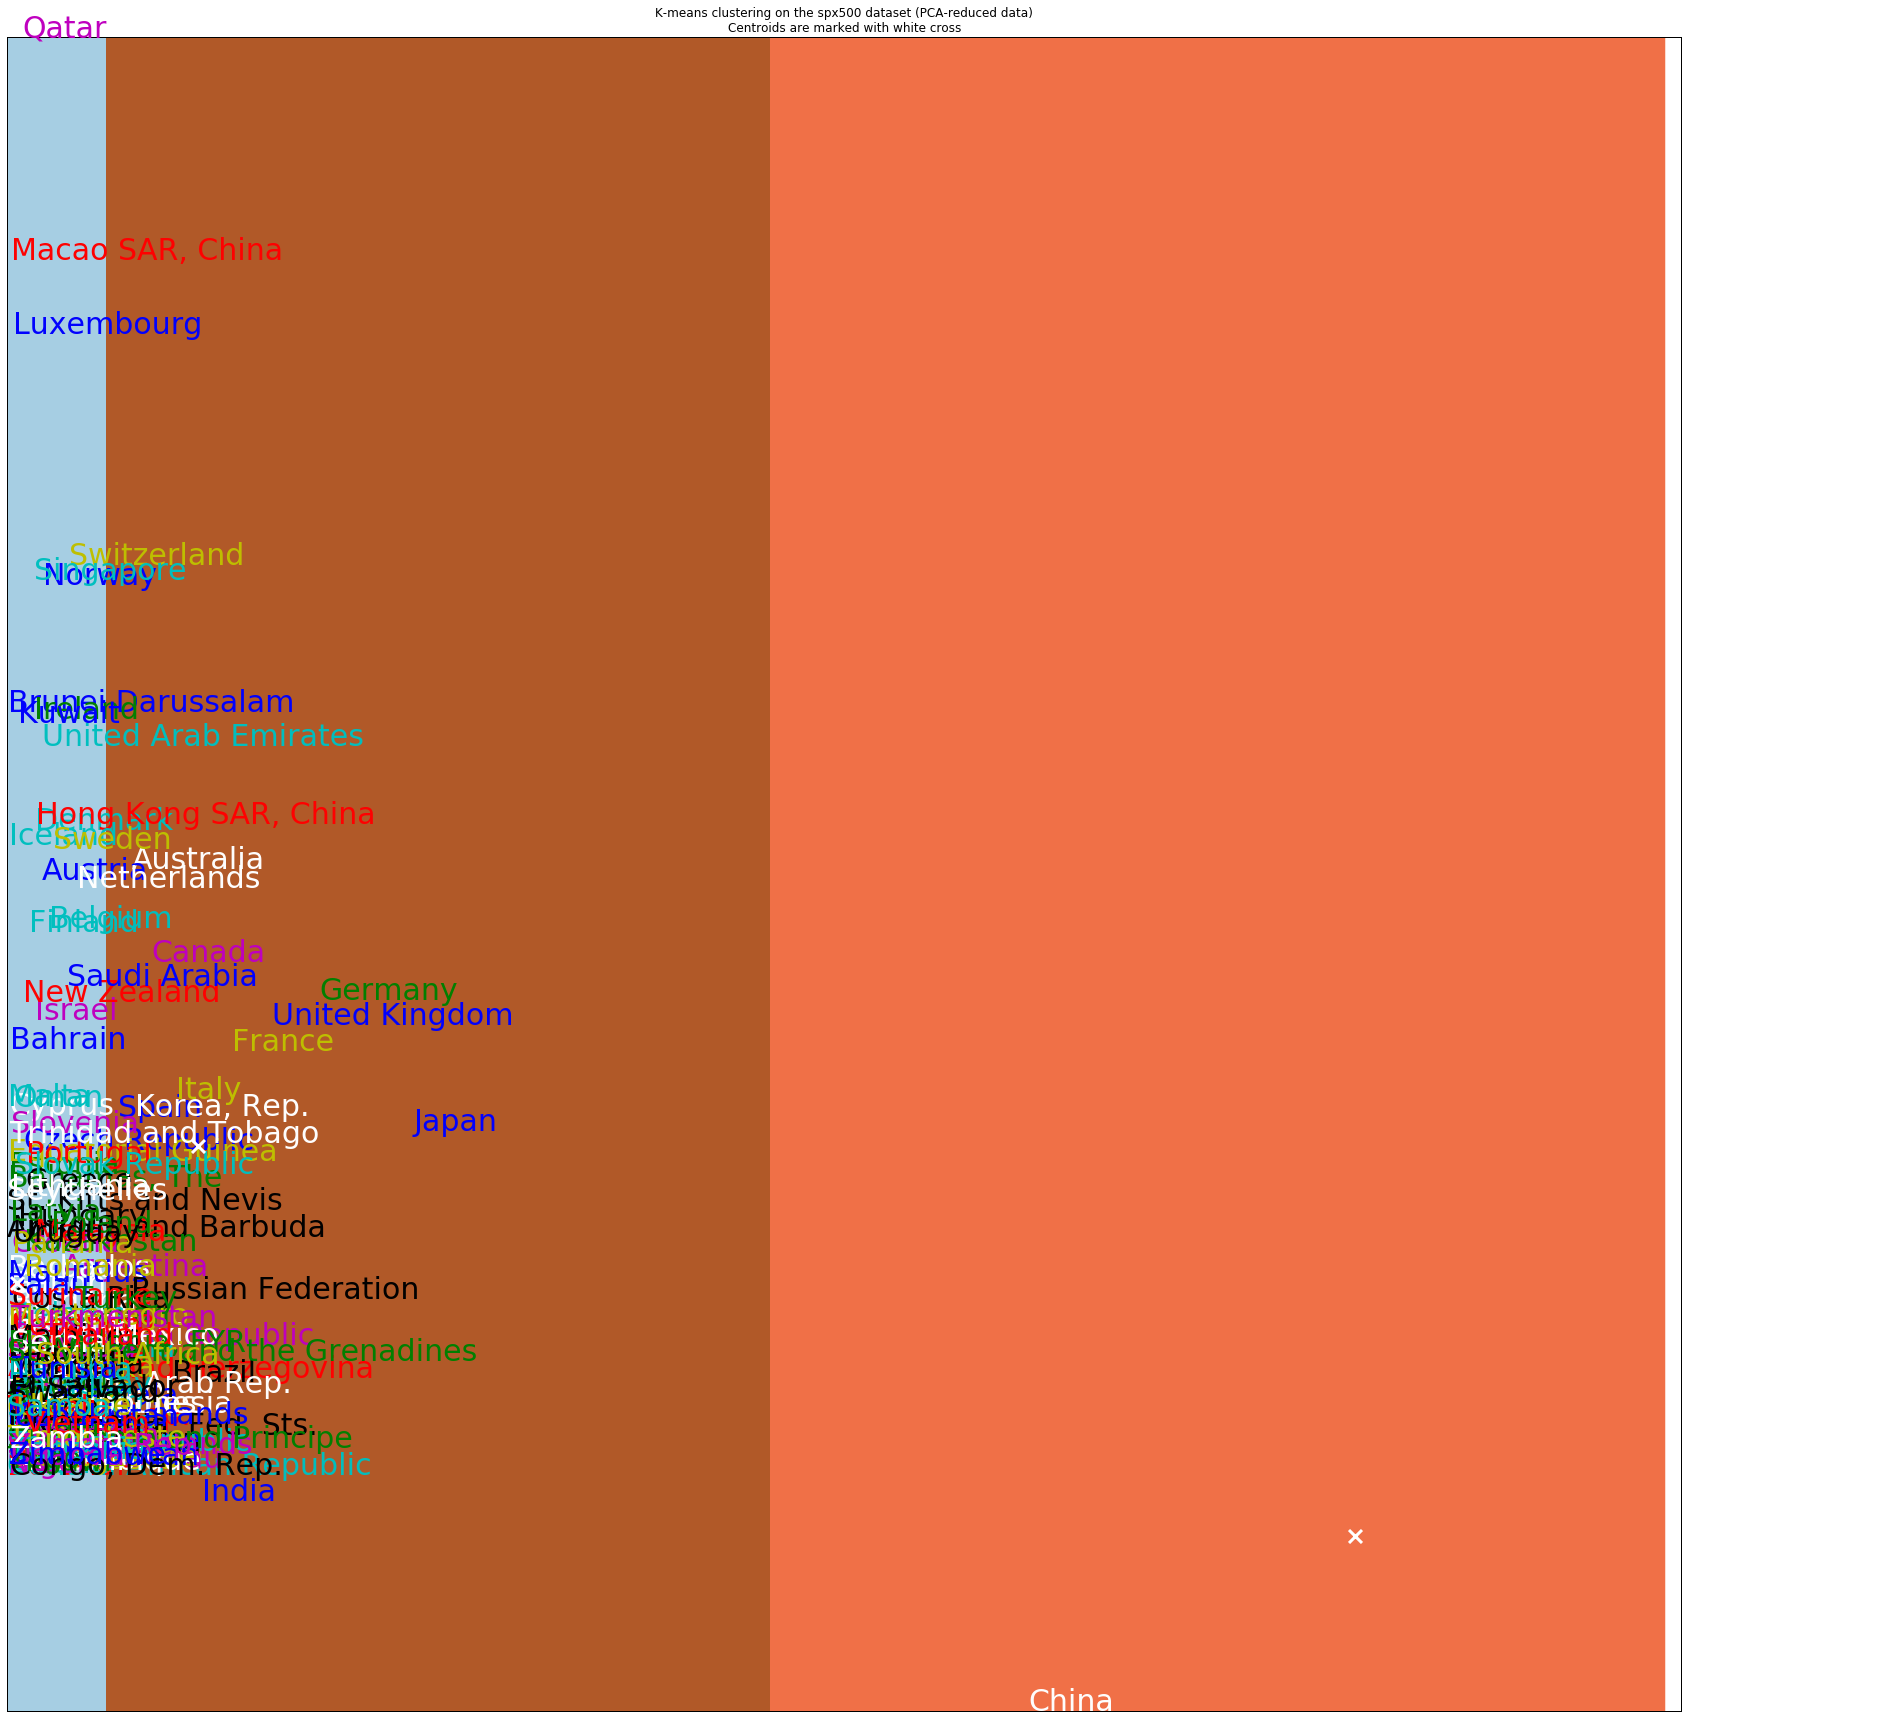

In [348]:
group_plot(data.dropna())

In [342]:
data.dropna().index.get_level_values('country')

Index([u'Afghanistan', u'Angola', u'Albania', u'United Arab Emirates',
       u'Argentina', u'Armenia', u'Antigua and Barbuda', u'Australia',
       u'Austria', u'Azerbaijan',
       ...
       u'United States', u'Uzbekistan', u'St. Vincent and the Grenadines',
       u'Vietnam', u'Samoa', u'Yemen, Rep.', u'South Africa',
       u'Congo, Dem. Rep.', u'Zambia', u'Zimbabwe'],
      dtype='object', name=u'country', length=177)

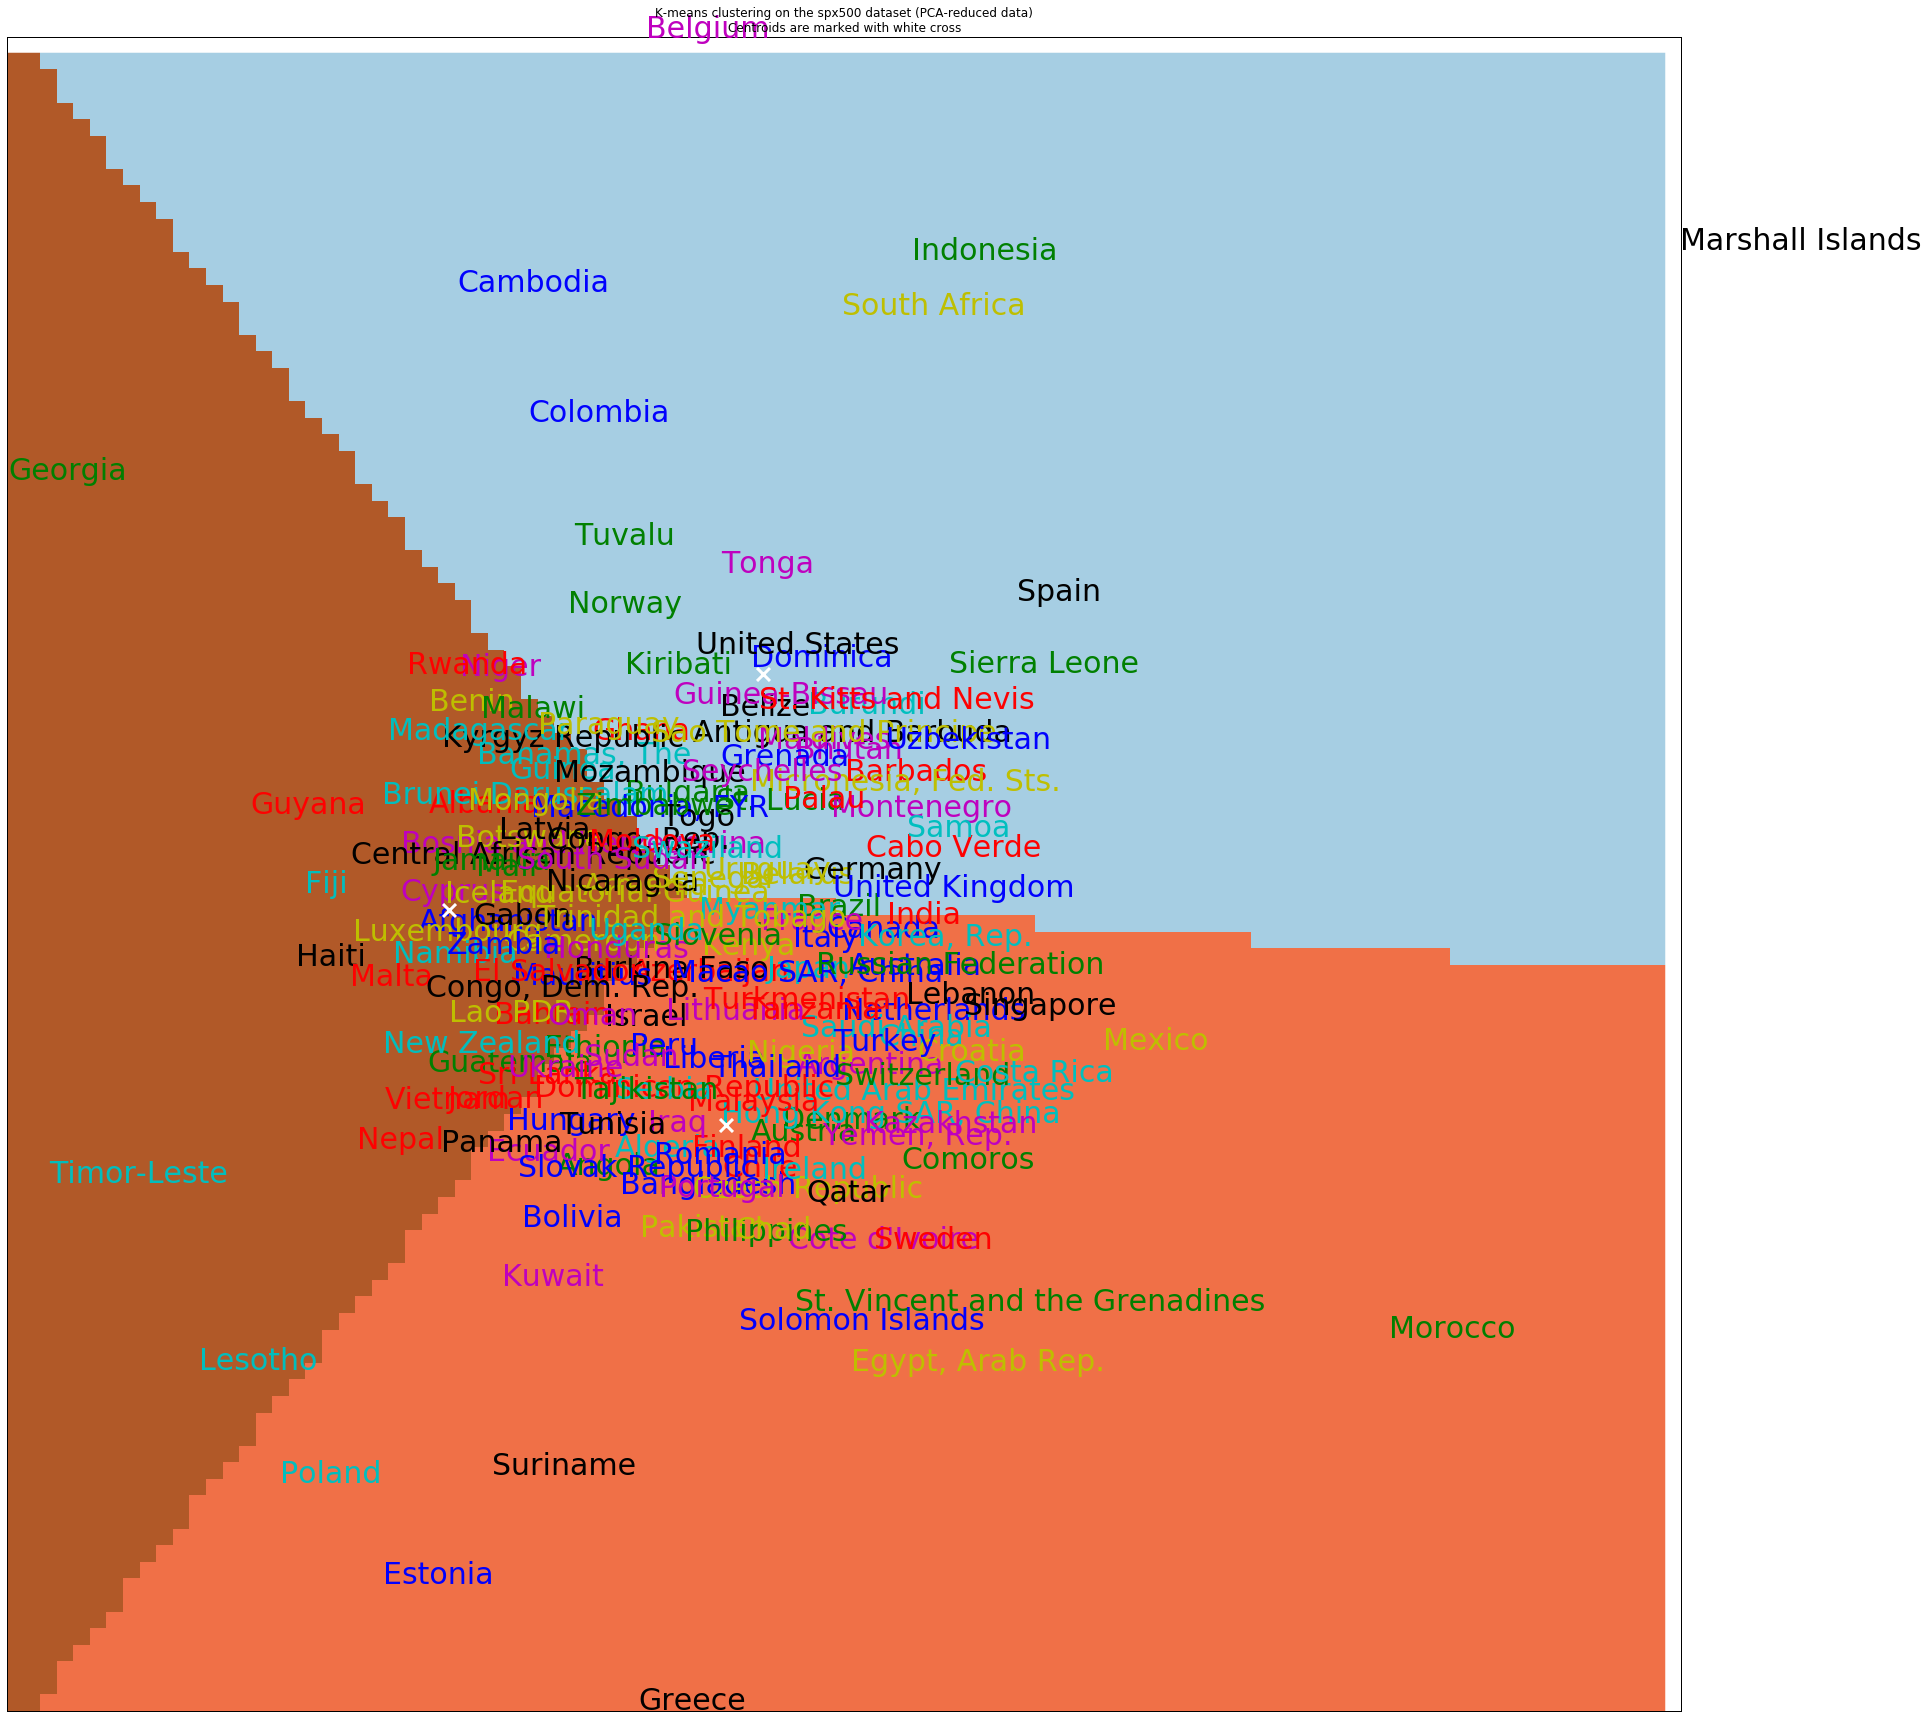

In [346]:
from sklearn.manifold import TSNE
def group_plot_TSNE(X):
    # h is the step siz
    h_n = 100
    reduced_data = TSNE(n_components=2).fit_transform(X)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(reduced_data)
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
    offset = 0.3
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - offset, reduced_data[:, 0].max() + offset
    y_min, y_max = reduced_data[:, 1].min() - offset, reduced_data[:, 1].max() + offset
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/h_n), np.arange(y_min, y_max, (y_max-y_min)/h_n))

    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.figure(figsize=(30,30))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    #plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=10)


    count = 0
    colors = "bgrcmykw"
    special_list = ["AAPL", "MSFT", "GOOG", "GOOGL", "DELL", "AMZN"]
    for i,j in zip(reduced_data[:, 0],reduced_data[:, 1]):
        corr = 0  # adds a little correction to put annotation in marker's centrum
        
        ticker = X.index.get_level_values('country')[count]
        if "Sector_id" in X.columns:
            plt.annotate(ticker,  xy=(i + corr, j + corr), size= 30, color=colors[X["Sector_id"][count]])
            
        else:
            if ticker in special_list:
                plt.annotate(ticker,  xy=(i + corr, j + corr), size= 30, color='w')
            else:
                plt.annotate(ticker,  xy=(i + corr, j + corr), size= 30, color=colors[count%7])
        count += 1
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the spx500 dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
group_plot_TSNE(data.dropna())